The local experiment is converted into scripts and run using `condor` to parallelise execution.

We follow the procedure outlined in 3.1.2.1 (Experiment 1), with

* $n \in \{12, \dots, 20 \}$
* $k = 8$
* $p \in \{1, 2, 4, 8, 16\}$
* training instances = $100$
* evaluation instances = $2500$

Generation of $\underline{\beta}^*, \underline{\gamma}^* \in \mathbb{R}^p$ is done on 100 instances of CNF(12, 8, $r_k$) for 80 epochs using the ADAM optimiser with a learning rate of 0.1

QAOA is then evaluated over 2500 instances for each $n$ by parallelising across 10 processes, we combine and plot the results below.


In [8]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [17]:
ns = [i for i in range(12, 21)]
k = 8
ps = [1, 2, 4, 8, 16]
num_proc = 10
batch_size = 250

In [21]:
import json

parent_dir = os.path.dirname(os.getcwd())
dir = f"{parent_dir}/benchmark/exp1/results"

psucc = {n : {p : 0 for p in ps} for n in ns}

# Load and combine JSON files
for n in ns:
	for proc in range(num_proc):
		filename = f'{dir}/p_succ_{n}_{proc * batch_size}.json' 
		with open(filename, 'r') as f:
			data = json.load(f)
			for p in ps:
				psucc[n][p] += data[str(n)][str(p)] / (batch_size * num_proc)

<Figure size 1500x1000 with 0 Axes>

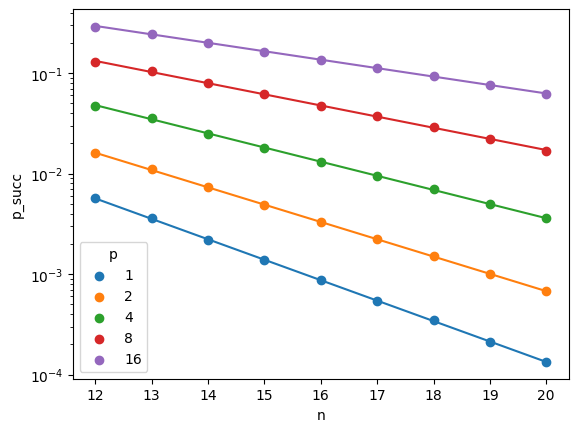

In [52]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 10))
fig, ax = plt.subplots()

x = list(psucc.keys())
ys = [[psucc[n][p] for n in x] for p in ps]

for (p, y) in zip(ps, ys):
	# Points
	ax.scatter(x, y, label=p)

	# Line of best fit
	coefficients = np.polyfit(x, np.log(y), 1)
	polynomial = np.poly1d(coefficients)
	ax.plot(x, np.exp(polynomial(x)))

ax.set_yscale('log')
ax.set_xlabel('n')
ax.set_ylabel('p_succ')
ax.legend(title='p')
plt.show()